# Introduction

In [1]:
# imports and plot customizations
import os
import sys
import pickle
import collections
import copy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import time

class TimeClass():
    def __init__(self):
        pass
    def __enter__(self):
        self.start = time.time()
    def __exit__(self, type, value, traceback):
        self.end = time.time()
        self.elapsed = round(self.end - self.start, 2)
        print('\nFinished executing in {} seconds\n'.format(self.elapsed))

In [3]:
matplotlib.rcParams['xtick.color'] = 'grey'
matplotlib.rcParams['ytick.color'] = 'grey'
matplotlib.rcParams['xtick.major.size'] = 7
matplotlib.rcParams['ytick.major.size'] = 7
# matplotlib.rcParams['xtick.labelsize'] = 10
# matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['xtick.minor.bottom'] = False
matplotlib.rcParams['ytick.minor.left'] = False
matplotlib.rcParams['figure.titlesize'] = 15
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.labelsize'] = 15
matplotlib.rcParams['axes.labelcolor'] = 'grey'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['xtick.major.pad'] = 8
matplotlib.rcParams['ytick.major.pad'] = 8
matplotlib.rcParams['legend.frameon'] = False
matplotlib.rcParams['axes.edgecolor'] = 'grey'
matplotlib.rcParams['text.color'] = 'grey'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['ytick.minor.visible'] = True
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['legend.loc'] = 'upper left'
matplotlib.rcParams['figure.constrained_layout.h_pad'] = 0.12
matplotlib.rcParams['figure.constrained_layout.w_pad'] = 0.12

# Gradient Descent

Despite the fact that machine learning is a very diverse field, including methods ranging from simple linear regression to deep learning, Gradient Descent is likely the main method to find (a.k.a. 'optimize', using terms more common in machine learning field) the models' parameters (a.k.a. weights). The first question I asked myself at the time I started working with machine learning is simply: why is it the most commonly chosen method? The answer is not clear at first when fitting a simple linear model that can be solved using very simple linear algebra equations. I becomes clear when complex models with houndreds or even thousands of parameters are fit. In such cases, approaching the question using algebra will be extremely demanding in terms of computation or even make the optimization of the weights impossible. In such cases optimization methods (numeric) are the default choice.
Here I will start from the simplest example explaining the principle and gradually extend it to a more general case with application to solve a very simple linear model.

The key to understand the gradient descent is to understand that the weights are adjusted every iteration using the derivate of the gradient. The main idea is that subtracting the derivate to the weights allow the fit to approach the minima in the next iteration. The cost function that I chose to use here is the simplest one: the sum of squares. The derivate of the sum of squares is a bell curve ('U' shaped curve) defined as: 

Sum of squeres cost function derivate over weights: $\frac{\delta Cost}{\delta Weight} = (prediction - y) * x$

# Single parameter gradient descent

In [38]:
def gradient_descent(goal_pred, input_, epoch) :
    weight = 0.0
    weight_list = []
    pred_list = []
    delta_list = []
    weight_delta_list = []
    weight_list = []
    error_list = []
    epoch_list = list(range(int(epoch)))
    for i in range(int(epoch)):
        weight_list.append(weight)
        pred = input_ * weight
        pred_list.append(pred)

        print(f'weight: {weight}, Prediction: {pred}')
        error = (pred - goal_pred) ** 2
        error_list.append(error)
        delta = pred - goal_pred
        delta_list.append(delta)

        weight_delta = delta * input_
        weight_delta_list.append(weight_delta)
        weight = weight - weight_delta
        print(f'delta: {delta}, weight_delta: {weight_delta}, weight: {weight}\nError: {error}\n')
    
    output = {'weight':weight_list, 'pred':pred_list, 'error':error_list, 
            'delta':delta_list, 'weight_delta':weight_delta_list, 'epoch':epoch_list}
    
    fig, ax = plt.subplots(2,2, constrained_layout=True, figsize = (8,8))
    ax[0,0].plot(output['epoch'], output['error'], c = 'grey', linewidth = 3)
    ax[0,1].scatter(output['weight'], output['error'], c = output['epoch'])
    ax[1,0].plot(output['epoch'], output['pred'], c = 'grey', linewidth = 3)
    ax[1,1].plot(output['epoch'], output['weight'], c = 'tab:green', linewidth = 3)
    for axes, xlab, ylab in zip(ax.ravel().tolist(), ['epoch']+['weight']+['epoch']*2, ['Error']*2+['pred', 'weight']):
        axes.set(xlabel = xlab, ylabel = ylab)
        
    return output

Converging example:

weight: 0.0, Prediction: 0.0
delta: -2.0, weight_delta: -1.0, weight: 1.0
Error: 4.0

weight: 1.0, Prediction: 0.5
delta: -1.5, weight_delta: -0.75, weight: 1.75
Error: 2.25

weight: 1.75, Prediction: 0.875
delta: -1.125, weight_delta: -0.5625, weight: 2.3125
Error: 1.265625

weight: 2.3125, Prediction: 1.15625
delta: -0.84375, weight_delta: -0.421875, weight: 2.734375
Error: 0.7119140625

weight: 2.734375, Prediction: 1.3671875
delta: -0.6328125, weight_delta: -0.31640625, weight: 3.05078125
Error: 0.40045166015625

weight: 3.05078125, Prediction: 1.525390625
delta: -0.474609375, weight_delta: -0.2373046875, weight: 3.2880859375
Error: 0.22525405883789062

weight: 3.2880859375, Prediction: 1.64404296875
delta: -0.35595703125, weight_delta: -0.177978515625, weight: 3.466064453125
Error: 0.12670540809631348

weight: 3.466064453125, Prediction: 1.7330322265625
delta: -0.2669677734375, weight_delta: -0.13348388671875, weight: 3.59954833984375
Error: 0.07127179205417633

weight: 3.59954833

{'weight': [0.0,
  1.0,
  1.75,
  2.3125,
  2.734375,
  3.05078125,
  3.2880859375,
  3.466064453125,
  3.59954833984375,
  3.6996612548828125,
  3.7747459411621094,
  3.831059455871582,
  3.8732945919036865,
  3.904970943927765,
  3.9287282079458237,
  3.9465461559593678,
  3.959909616969526,
  3.9699322127271444,
  3.9774491595453583,
  3.9830868696590187],
 'pred': [0.0,
  0.5,
  0.875,
  1.15625,
  1.3671875,
  1.525390625,
  1.64404296875,
  1.7330322265625,
  1.799774169921875,
  1.8498306274414062,
  1.8873729705810547,
  1.915529727935791,
  1.9366472959518433,
  1.9524854719638824,
  1.9643641039729118,
  1.9732730779796839,
  1.979954808484763,
  1.9849661063635722,
  1.9887245797726791,
  1.9915434348295094],
 'error': [4.0,
  2.25,
  1.265625,
  0.7119140625,
  0.40045166015625,
  0.22525405883789062,
  0.12670540809631348,
  0.07127179205417633,
  0.040090383030474186,
  0.02255084045464173,
  0.012684847755735973,
  0.007135226862601485,
  0.004013565110213335,
  0.002257

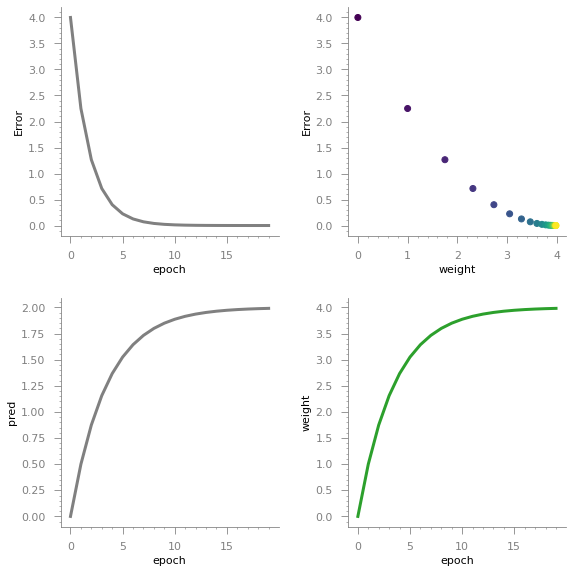

In [39]:
gradient_descent(goal_pred = 2, input_ = .5, epoch = 20) # converging from one side (steps are small)

Converging example with ping-pong from either sides of the curve:

weight: 0.0, Prediction: 0.0
delta: -2.0, weight_delta: -2.8, weight: 2.8
Error: 4.0

weight: 2.8, Prediction: 3.9199999999999995
delta: 1.9199999999999995, weight_delta: 2.6879999999999993, weight: 0.11200000000000054
Error: 3.686399999999998

weight: 0.11200000000000054, Prediction: 0.15680000000000074
delta: -1.8431999999999993, weight_delta: -2.5804799999999988, weight: 2.6924799999999993
Error: 3.3973862399999972

weight: 2.6924799999999993, Prediction: 3.7694719999999986
delta: 1.7694719999999986, weight_delta: 2.477260799999998, weight: 0.21521920000000128
Error: 3.131031158783995

weight: 0.21521920000000128, Prediction: 0.3013068800000018
delta: -1.6986931199999982, weight_delta: -2.3781703679999975, weight: 2.5933895679999988
Error: 2.885558315935328

weight: 2.5933895679999988, Prediction: 3.630745395199998
delta: 1.6307453951999982, weight_delta: 2.283043553279997, weight: 0.3103460147200017
Error: 2.659330543965998

weight: 0.3103460147200017, Prediction: 0.434484420608002

{'weight': [0.0,
  2.8,
  0.11200000000000054,
  2.6924799999999993,
  0.21521920000000128,
  2.5933895679999988,
  0.3103460147200017,
  2.5020678258687985,
  0.3980148871659539,
  2.417905708320684,
  0.47881052001214375,
  2.3403419007883417,
  0.5532717752431926,
  2.268859095766535,
  0.6218952680641268,
  2.2029805426584383,
  0.6851386790478995,
  2.1422668681140165,
  0.7434238066105447,
  2.086313145653877,
  0.7971393801722786,
  2.0347461950346126,
  0.846643652766772,
  1.9872220933438989,
  0.8922667903898571,
  1.9434238812257372,
  0.9343130740232923,
  1.9030594489376396,
  0.9730629290198664,
  1.8658595881409283,
  1.008774795384709,
  1.8315761964306794,
  1.0416868514265483,
  1.7999806226305137,
  1.0720186022747071,
  1.770862141816281,
  1.0999723438563704,
  1.7440265498978844,
  1.1257345120980315,
  1.71929486838589,
  1.1494769263495457,
  1.6965021507044362,
  1.1713579353237418,
  1.6754963820892081,
  1.1915234731943605,
  1.656137465733414,
  1.2101080328

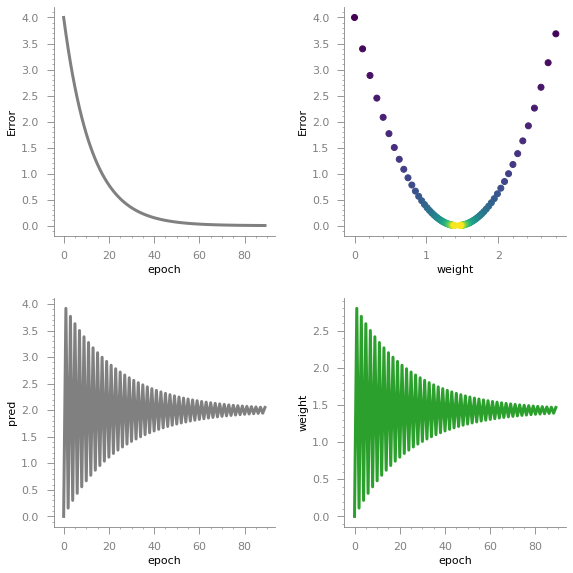

In [47]:
gradient_descent(goal_pred = 2, input_ = 1.4, epoch = 90) # converging but ping pong from one side to the other, steps are quite big

Diverging example:

weight: 0.0, Prediction: 0.0
delta: -2.0, weight_delta: -3.6, weight: 3.6
Error: 4.0

weight: 3.6, Prediction: 6.48
delta: 4.48, weight_delta: 8.064000000000002, weight: -4.464000000000002
Error: 20.070400000000003

weight: -4.464000000000002, Prediction: -8.035200000000005
delta: -10.035200000000005, weight_delta: -18.06336000000001, weight: 13.599360000000008
Error: 100.7052390400001

weight: 13.599360000000008, Prediction: 24.478848000000013
delta: 22.478848000000013, weight_delta: 40.461926400000024, weight: -26.862566400000016
Error: 505.2986074071046

weight: -26.862566400000016, Prediction: -48.35261952000003
delta: -50.35261952000003, weight_delta: -90.63471513600007, weight: 63.77214873600005
Error: 2535.386292525888

weight: 63.77214873600005, Prediction: 114.78986772480009
delta: 112.78986772480009, weight_delta: 203.02176190464016, weight: -139.2496131686401
Error: 12721.554261377902

weight: -139.2496131686401, Prediction: -250.6493037035522
delta: -252.6493037035522, weig

{'weight': [0.0,
  3.6,
  -4.464000000000002,
  13.599360000000008,
  -26.862566400000016,
  63.77214873600005,
  -139.2496131686401,
  315.51913349775384,
  -703.1628590349687,
  1578.6848042383303],
 'pred': [0.0,
  6.48,
  -8.035200000000005,
  24.478848000000013,
  -48.35261952000003,
  114.78986772480009,
  -250.6493037035522,
  567.934440295957,
  -1265.6931462629439,
  2841.6326476289946],
 'error': [4.0,
  20.070400000000003,
  100.7052390400001,
  505.2986074071046,
  2535.386292525888,
  12721.554261377902,
  63831.67066188975,
  320281.7907130981,
  1607045.9130820415,
  8063513.573480454],
 'delta': [-2.0,
  4.48,
  -10.035200000000005,
  22.478848000000013,
  -50.35261952000003,
  112.78986772480009,
  -252.6493037035522,
  565.934440295957,
  -1267.6931462629439,
  2839.6326476289946],
 'weight_delta': [-3.6,
  8.064000000000002,
  -18.06336000000001,
  40.461926400000024,
  -90.63471513600007,
  203.02176190464016,
  -454.76874666639395,
  1018.6819925327226,
  -2281.847

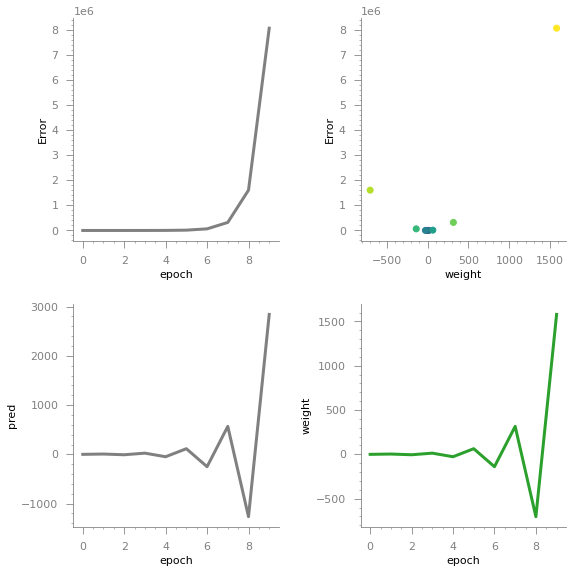

In [29]:
gradient_descent(goal_pred = 2, input_ = 1.8, epoch = 10) # diverging, steps are too big

From these examples we can see that whenever the input is large enough (last example) the derivate becomes also large and as a consequence the weights become large. This implies that instead of approaching the minima, we make a much larger step and go all the way to the other side of the curve exceeding the point where the cost function would be lower than the previous iteration. The example in the middle explains the milder version of this problem, the case in which the wheights are large enough to go all the way to the other side of the curve but not large enough to pass the point in which the cost funcion increases again.

This is one of the most important concepts in any optimization method: the input values can cause divergence if large enough. To compensate for this, it is a common practice to introduce the alpha (scalar) parameter with the purpose of adjusting the step size in case the derivate becomes too large.

# Multiple parameters gradient descent

In [17]:
def gradient_descent_vector(goal_pred, input_, weights, alpha = 1, epoch = 10):
    input_ = np.float64(input_)
    weights = np.float64(weights)
    weights_list = np.zeros((epoch, len(input_)))
    pred_list = np.zeros(epoch)
    delta_list = np.zeros(epoch)
    weights_deltas_list = np.zeros((epoch, len(input_)))
    error_list = np.zeros(epoch)
    epoch_list = np.arange(epoch)
    
    for i in epoch_list:
        pred_list[i] = np.dot(input_, weights)
        delta_list[i] = pred_list[i] - goal_pred
        error_list[i] = delta_list[i] ** 2
        weights_deltas_list[i, :] = delta_list[i] * input_
        #print(weights, weights_deltas_list[i, :], alpha * weights_deltas_list[i, :])
        weights -= alpha * weights_deltas_list[i, :]
        weights_list[i, :] = weights
    output = {'weight':weights_list, 'pred':pred_list, 'error':error_list, 
            'delta':delta_list, 'weight_delta':weights_deltas_list, 'epoch':epoch_list}
    
    fig, ax = plt.subplots(1, len(weights), constrained_layout=True, figsize = (4*len(weights),4))
    for i in range(len(weights)):
        ax[i].scatter(output['weight'][:, i], output['error'], c = output['epoch'])
    for axes, xlab, ylab in zip(ax.ravel().tolist(), ['weight ' + str(x) for x in range(len(weights))], ['error'] * len(weights)):
        axes.set(xlabel = xlab, ylabel = ylab)
    return output

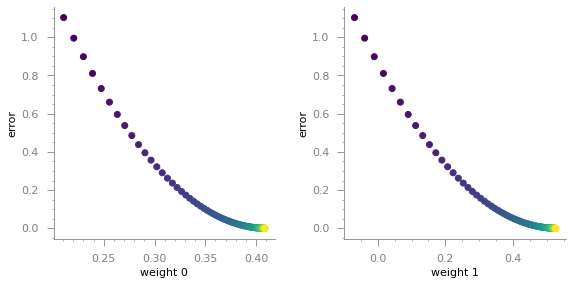

In [36]:
solution_2_inputs = gradient_descent_vector(
    goal_pred = 1, 
    input_ = [0.5, 1.5], 
    weights = [0.2, -.1], 
    alpha = 2e-2, 
    epoch = 100
)

The method is exactly the same as for a single scalar input, the only difference is that when the derivate is computed, instead of obtaining a scalar value, the weight vector is multiplied by delta thereby returning a new vector.

Obviously, being a 2 variable linear model with one equation, there are infinite solutions to the equation. Therefore, the solution found here is the one that is found first from the direction imposed by the starting weights proposed (see plot below).

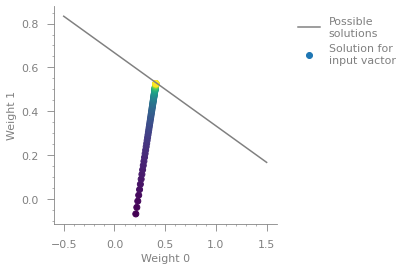

In [35]:
input_vactor = [0.5, 1.5]
goal_prediction = 1
x_range = np.linspace(input_vactor[0] - 1, input_vactor[0] + 1, 10)
def equation(w0):
    w1 = (1 - 0.5 * w0) / 1.5
    return w1

fig, ax = plt.subplots(1, 1, figsize = (4,4))
ax.plot(x_range, equation(x_range), c = 'grey', label = 'Possible\nsolutions')
ax.scatter(
    solution_2_inputs['weight'][:, 0], 
    solution_2_inputs['weight'][:, 1], 
    c = solution_2_inputs['epoch'], label = 'Solution for\ninput vactor')
ax.set_xlabel('Weight 0', color = 'grey')
ax.set_ylabel('Weight 1', color = 'grey')
_ = ax.legend(bbox_to_anchor = (1.05, 1))

# Multiple parameters, multiple samples (linear model) gradient descent

In [71]:
def gradient_descent_matrix(X, y, weights = None, alpha = 1, epoch = 100):
    n_samples = X.shape[0]
    n_params = X.shape[1]
    
    if weights == None:
        weights = np.zeros(n_params) 
    else:
        weights = np.float64(weights)
        
    if len(weights) != n_params:
        raise Exception(f'Weights must have the same length as the columns in X')
        
    weights_list = np.zeros((epoch, n_params))
    pred_list = np.zeros((epoch, n_samples))
    delta_list = np.zeros((epoch, n_samples))
    weights_deltas_list = np.zeros((epoch, n_params))
    error_list = np.zeros(epoch)
    epoch_list = np.arange(epoch)
    
    for i in epoch_list:
        pred_list[i] = np.dot(X, weights)
        delta_list[i] = pred_list[i] - y
        error_list[i] = np.linalg.norm(delta_list[i])**2 / (n_samples - n_params - 1) # Residual Variance
        weights_deltas_list[i, :] = np.dot(X.T, delta_list[i]) / (n_samples - n_params - 1)
        weights -= alpha * weights_deltas_list[i, :]
        weights_list[i, :] = weights

    output = {'weight':weights_list, 'pred':pred_list, 'error':error_list, 
            'delta':delta_list, 'weight_delta':weights_deltas_list, 'epoch':epoch_list}
    
    ols_coef = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.dot(X.T, y)) # (X.T X)^-1 X.T y = (X.T X)^-1 (X.T X) beta
    print(f'OLS weights estimate: {ols_coef}')
    print(f'Final weights estimate: {weights}')

    _, ax = plt.subplots(2,2, constrained_layout=True, figsize = (8,8))
    ax[0,0].plot(output['epoch'], output['error'], color = 'grey', linewidth = 3)
    ax[0,1].scatter(X[:, 1], y, c = 'grey')
    ax[0,1].plot(X[:, 1], np.dot(X, ols_coef), c = 'tab:orange', label = 'OLS')
    ax[0,1].plot(X[:, 1], np.dot(X, output['weight'][-1]), c = 'tab:green', label = 'Grad.\nDescent')
    ax[0,1].legend()
    ax[1,0].plot(output['epoch'], output['weight'][:, 0], color = 'tab:green', linewidth = 3)
    ax[1,1].plot(output['epoch'], output['weight'][:, 1], color = 'tab:green', linewidth = 3)
    for axes, xlab, ylab in zip(ax.ravel()[[1,0,2,3]].tolist(), ['x'] + ['epoch'] *3, ['y', 'Error', 'weight 0', 'weight 1']):
            axes.set(xlabel = xlab, ylabel = ylab)
    
    return output

In [74]:
coef = [4, 3]
X = np.power.outer(np.random.rand(100), [0, 1]) # [0 = intercept col, 1 = x]
y = np.dot(X, coef) + np.random.rand(100)

OLS weights estimate: [4.47865232 3.07097196]
Final weights estimate: [4.66317003 2.66952687]


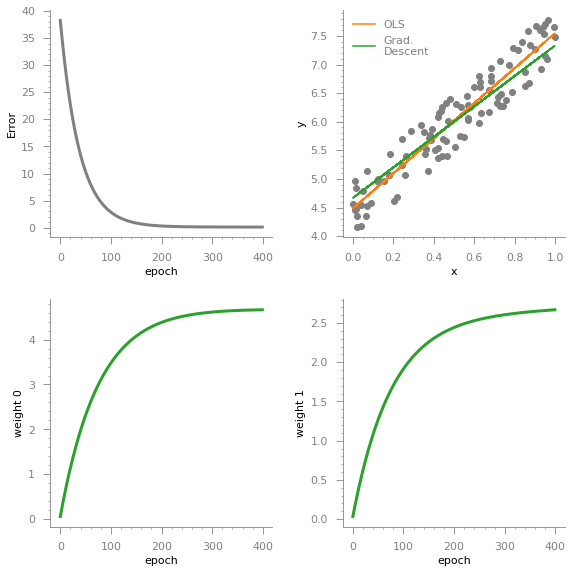

In [75]:
coef_estimate = gradient_descent_matrix(X, y, weights = [0, 0], alpha = 1e-2, epoch = 400)

In this case, with the chosen 'alpha' the gradient descent optimizes te weights after just ~200 iterations. 

Changing 'alpha' changes the step size and therefore how quickly the minima in the cost function is achieved.

OLS weights estimate: [4.47865232 3.07097196]
Final weights estimate: [4.37507057 2.43982875]


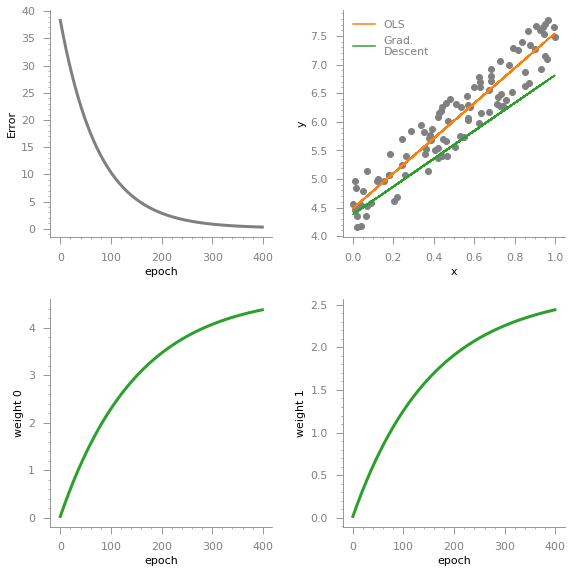

In [94]:
coef_estimate = gradient_descent_matrix(X, y, weights = [0, 0], alpha = 0.5*1e-2, epoch = 400)

The example above enphasizes how important it is to chose the correct magnitude of alpha. This has a tremendous effect not only on whether or not the optimization will converge to a minima but also on the amount of iteration it takes to get there.
Choosing the ideal 'alpha' is a dogma in most machine learning method and a common point of optimization. 

OLS weights estimate: [4.47865232 3.07097196]
Final weights estimate: [4.49561945 3.03943788]


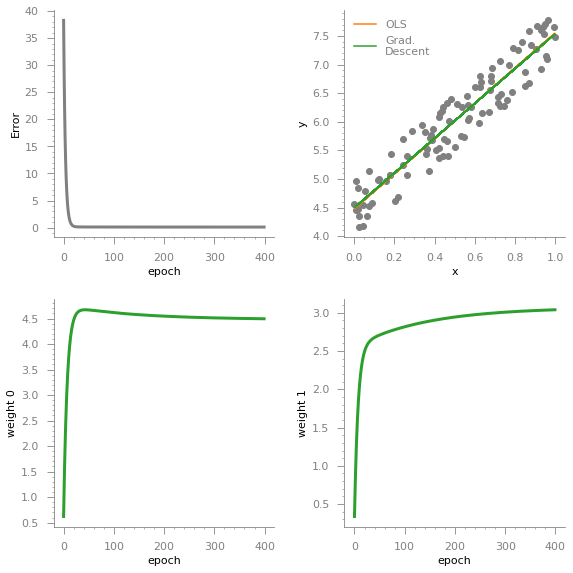

In [152]:
coef_estimate = gradient_descent_matrix(X, y, weights = [0, 0], alpha = 1e-1, epoch = 400)

This last example enphasizes another very important concept in gradient descent: looking at the weight for the intercept(weight 0), it is possible to sse an increment followed by a decrement.

This has to do with the fact that the optimization doesn't work linearly. In this case the 'U' shaped bell curved is spanning 2 dimensions (2 weights), the optimization follows the path that provides the LOCAL steepest decrement. In the case above, until iteration ~30, the algorithm found one locally steeper direction; this trajectory changed at around 30 iterations, at that stage, decreasing the intercept weight and increasing the weight on x provided steeper decrements in the cost function.  

[Text(0.5, 0, 'weight 1'), Text(0, 0.5, 'Mean sq.')]

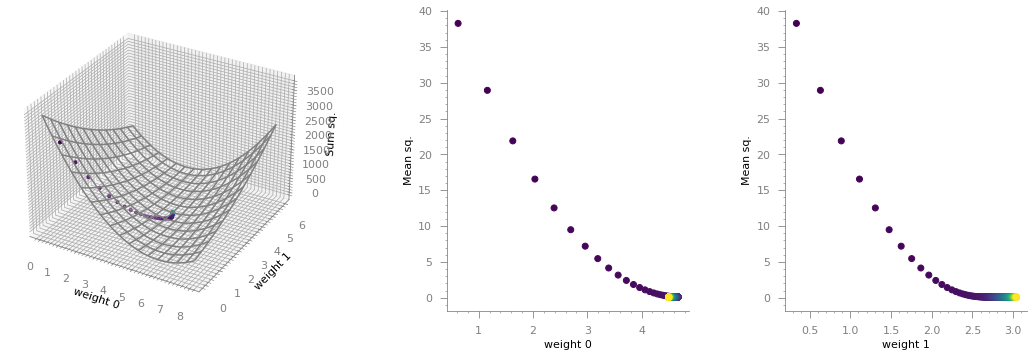

In [191]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

def sum_of_squares(w0, w1):
    pred = np.dot(X, [w0, w1])
    delta = pred - y
    sum_of_squares = np.linalg.norm(delta)**2
    return sum_of_squares

grid = np.mgrid[0:8:0.1, 0:6:0.1]
sum_squares = np.vectorize(sum_of_squares)(*grid)
sum_squares_optimization = np.vectorize(sum_of_squares)(*coef_estimate['weight'].T)

fig = plt.figure(constrained_layout=True, figsize = (15, 5))
gc1 = fig.add_gridspec(nrows = 1, ncols = 3, width_ratios=[5,3,3])
fig.set_constrained_layout_pads(wspace=0.1) 

ax = fig.add_subplot(gc1[0, 0], projection='3d')
#ax.plot_surface(*grid, sum_squares, rstride=1, cstride=1, cmap=matplotlib.cm.viridis.reversed(),
#                       linewidth=0, antialiased=False)
ax.plot_wireframe(*grid, sum_squares, rstride=5, cstride=5, colors = 'grey')

ax.scatter(
    *coef_estimate['weight'].T,
    zs= sum_squares_optimization,
    s = 10,
    c = coef_estimate['epoch']
)  
ax.set(xlabel = 'weight 0', ylabel = 'weight 1', zlabel = 'Sum sq.')

ax.view_init(30, 300)

ax1 = fig.add_subplot(gc1[0, 1])
ax1.scatter(coef_estimate['weight'][:, 0], coef_estimate['error'], c = coef_estimate['epoch'])
ax1.set(xlabel = 'weight 0', ylabel = 'Mean sq.')

ax2 = fig.add_subplot(gc1[0, 2])
ax2.scatter(coef_estimate['weight'][:, 1], coef_estimate['error'], c = coef_estimate['epoch'])
ax2.set(xlabel = 'weight 1', ylabel = 'Mean sq.')

The first plot shows that the trajectory is not straight. 

Just for clarity, in the 2nd and 3rd plots, the error is not the sum of squares but the mean squares (sum of squares divided by the degrees of freedom). This was done just out of practicality since the gradient descent object already had this information.